<a href="https://colab.research.google.com/github/ToluGb/Hamoye-DSI-2020/blob/master/HSDC_Stage_E_(Time_Series_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [35]:
df["Month"] = pd.to_datetime(df["Month"]) #convert column to datetime

In [36]:
df.set_index("Month", inplace=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'Passengers')

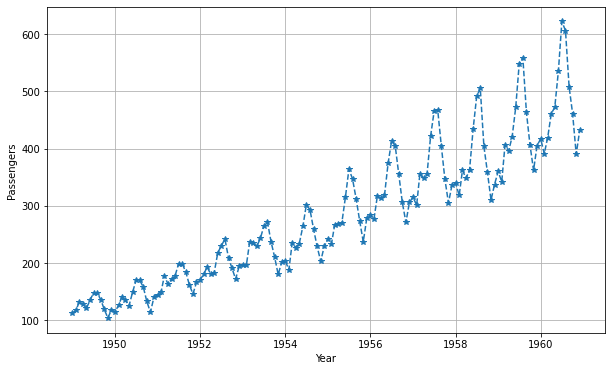

In [37]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Passengers, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

In [38]:
#check for missing values
df.isnull().values.any()

False

In [39]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [40]:
#There are no missing values in our dataset however, in bid to explain how we handle 
#missing values, we will make a copy of our dataset and delete some values at random.
df_copy = df.copy()

In [41]:
rows = df_copy.sample(frac=0.1, random_state=0)
rows['Passengers'] = np.nan
df_copy.loc[rows.index, 'Passengers'] = rows['Passengers']

In [42]:
df_copy.isnull().sum()
#There are now 14 missing values in the dataset

Passengers    14
dtype: int64

In [43]:
#Filling missing data by imputation - Forward fill
df_copy_ffill = df_copy.fillna(method='ffill')
df_copy_ffill.isnull().sum()

Passengers    0
dtype: int64

In [44]:
#Filling missing data by imputation - Backward fill
df_copy_bfill = df_copy.fillna(method='bfill')
df_copy_bfill.isnull().sum()

Passengers    0
dtype: int64

In [45]:
#Filling missing data by interpolation
df_copy_LIF = df_copy.interpolate(method='linear', limit_direction='forward')
df_copy_LIF.isnull().sum()

Passengers    0
dtype: int64

In [46]:
df_copy_LIB = df_copy.interpolate(method='linear', limit_direction='backward')
df_copy_LIB.isnull().sum()

Passengers    0
dtype: int64

**Moving Average Smoothing**

In [47]:
df_MA = df.copy()
df_MA.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [48]:
MA = df_MA['Passengers'].rolling(12).mean()
MA.head(14)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01    126.666667
1950-01-01    126.916667
1950-02-01    127.583333
Name: Passengers, dtype: float64

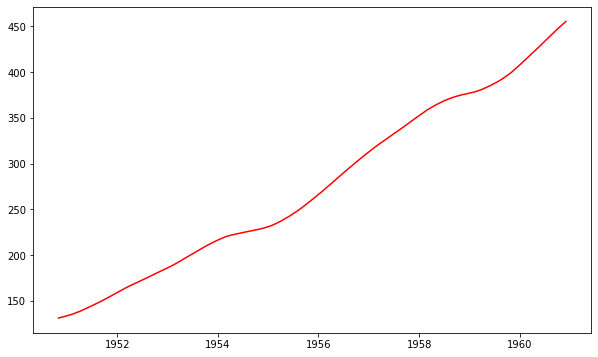

In [49]:
plt.figure(figsize=(10,6))
plt.plot(MA.rolling(12).mean(), color='red')

**Time Series Specific Exploratory Methods**

In [50]:
import statsmodels.api as sm

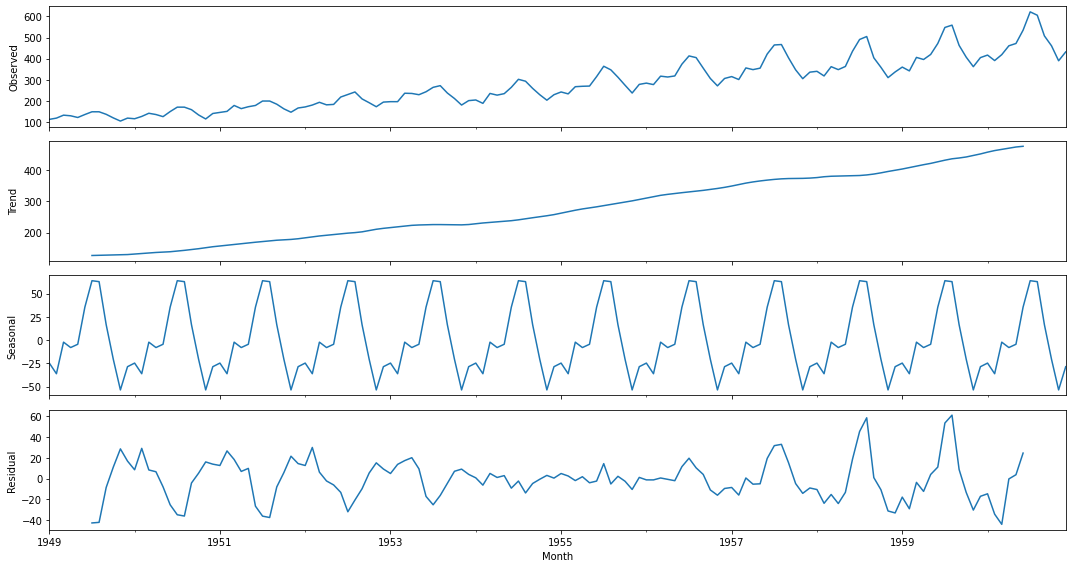

In [51]:
from pylab import rcParams
# Additive model
rcParams['figure.figsize'] = 15, 8
decompose_series_add = sm.tsa.seasonal_decompose(df['Passengers'], model='additive')
decompose_series_add.plot()
plt.show()

# The decomposed time series show an obvious increasing trend and seasonality variations.
# Recall that we have initially plotted the moving average on the last 12 months which showed that it varies with time. 
# This suggests that the data is not stationary.

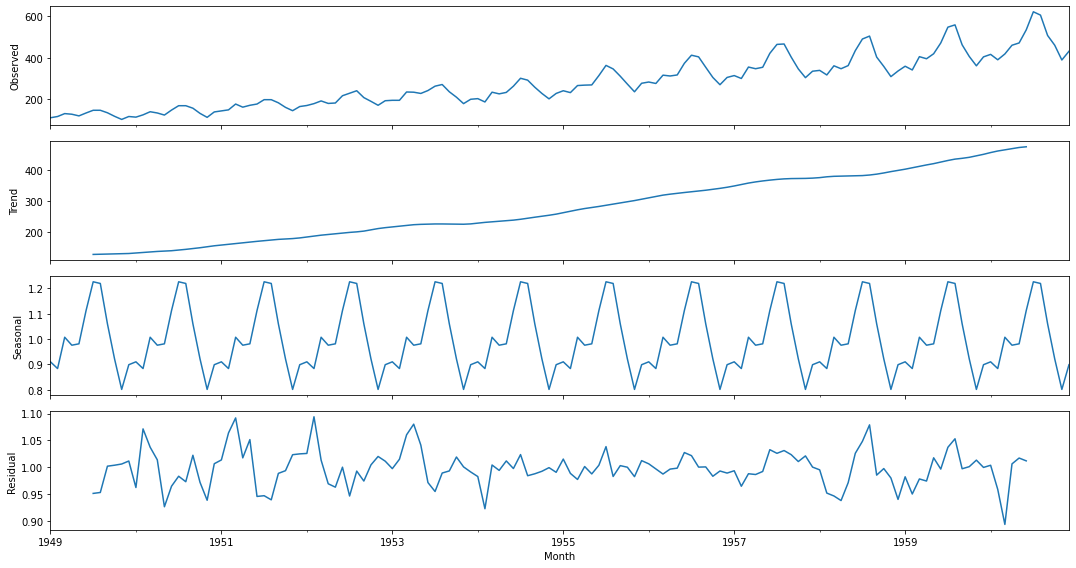

In [52]:
# Multiplicative model
rcParams['figure.figsize'] = 15, 8
decompose_series_mul = sm.tsa.seasonal_decompose(df['Passengers'], model='multiplicative')
decompose_series_mul.plot()
plt.show()

In [53]:
# Extract the Components
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([decompose_series_mul.seasonal, decompose_series_mul.trend, decompose_series_mul.resid, decompose_series_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
Month,,,,
1949-01-01,0.910230,NaN,NaN,112
1949-02-01,0.883625,NaN,NaN,118
1949-03-01,1.007366,NaN,NaN,132
1949-04-01,0.975906,NaN,NaN,129
1949-05-01,0.981378,NaN,NaN,121


In [54]:
# We will now perform an ADF test to confirm the speculation that the data is not stationary
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['Passengers'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 

ADF Statistic: 0.815368879206047
p-value: 0.991880243437641
No. of lags used: 13
No. of observations used : 130
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


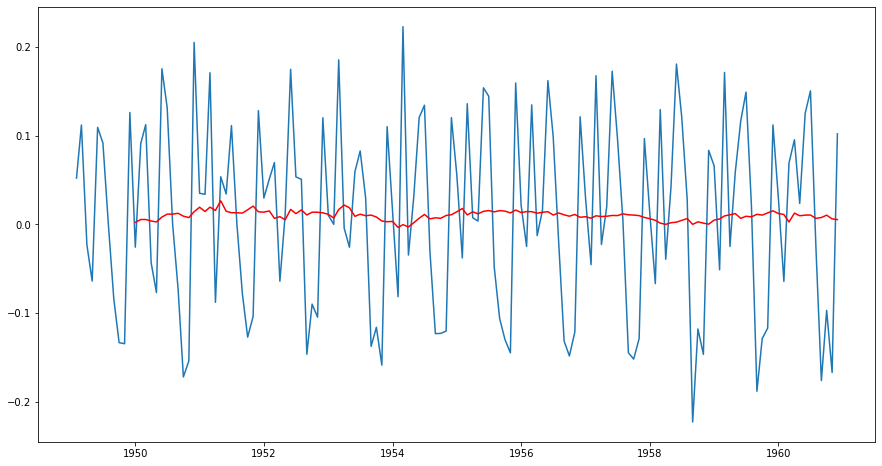

In [55]:
# From the results obtained, the p-value is greater than the critical value at a 5% significance level and,
# the ADF statistic is greater that any of the critical values obtain.
# This confirms that the series is indeed non-stationary.
# Convert time series to stationary by removing trend and seasonality
# Transformation and Differencing
df_log = np.log(df)
df_diff = df_log.diff(periods=1)
plt.plot(df_diff.index, df_diff.Passengers, '-')
plt.plot(df_diff.rolling(12).mean(), color='red')

In [56]:
#Downsample to quarterly data points
df_quarterly = df.resample('3M').mean()

#Upsample to daily data points
df_daily = df.resample('D').mean()

In [57]:
df_quarterly.head()

,Passengers
Month,
1949-01-31,112.000000
1949-04-30,126.333333
1949-07-31,134.666667
1949-10-31,134.333333
1950-01-31,112.333333


In [58]:
df_daily.head()

,Passengers
Month,
1949-01-01,112.0
1949-01-02,NaN
1949-01-03,NaN
1949-01-04,NaN
1949-01-05,NaN


**Time Series Forecasting using Stochastic Models**

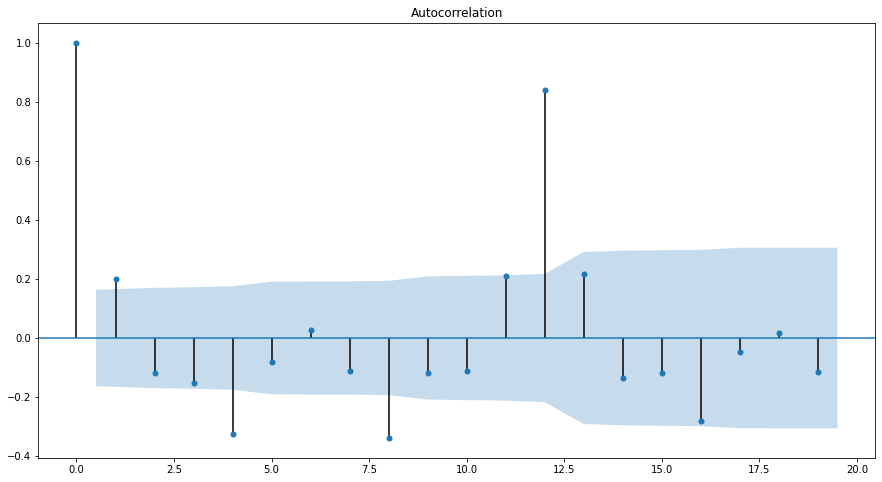

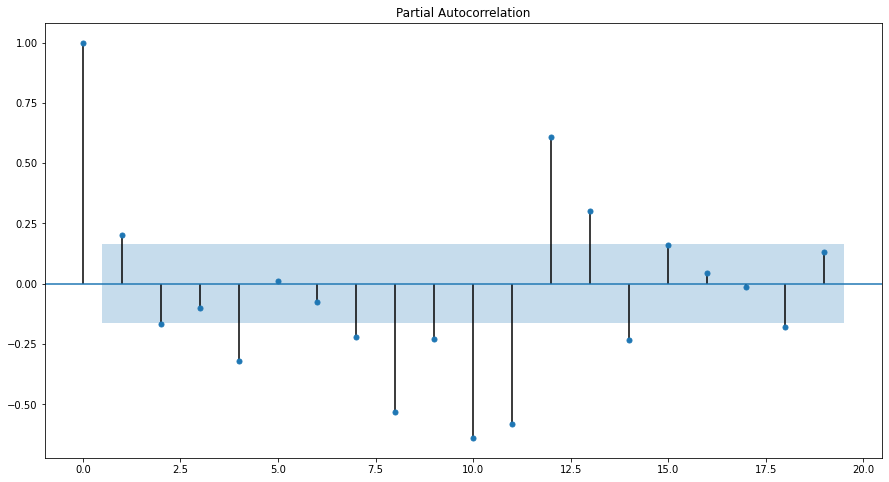

In [60]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df_diff = df_diff.fillna(method='bfill')
#ACF
plot_acf(df_diff, lags = range(0, 20))
plt.show()
#PACF
plot_pacf(df_diff, lags = range(0, 20))
plt.show()
#The shaded regions in the plots are the confidence intervals.
#The lags where the PACF and ACF charts cross this region are the values for p and q respectively. In both plots, #p=q=1.

#The shaded regions in the plots are the confidence intervals. 
#The lags where the PACF and #ACF charts cross this region are the values for p and q respectively. 
#In the ACF plot, there is one lag that crosses the significance level hence, q=1. Similarly #in the PACF plot, p=2

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


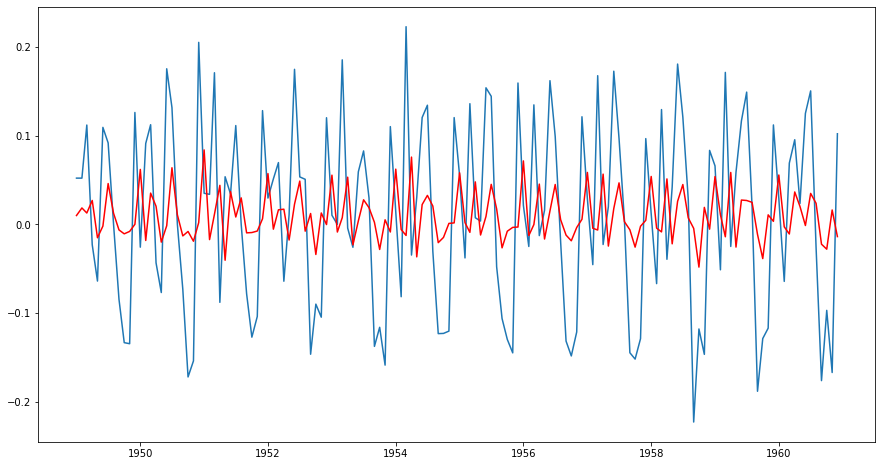

In [61]:
#AR, MA and ARIMA
from statsmodels.tsa.arima_model import ARIMA
#(p,d,q)
AR_model = ARIMA(df_diff, order=(2,0,0))
AR_model_results = AR_model.fit()
plt.plot(df_diff)
plt.plot(AR_model_results.fittedvalues, color='red')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


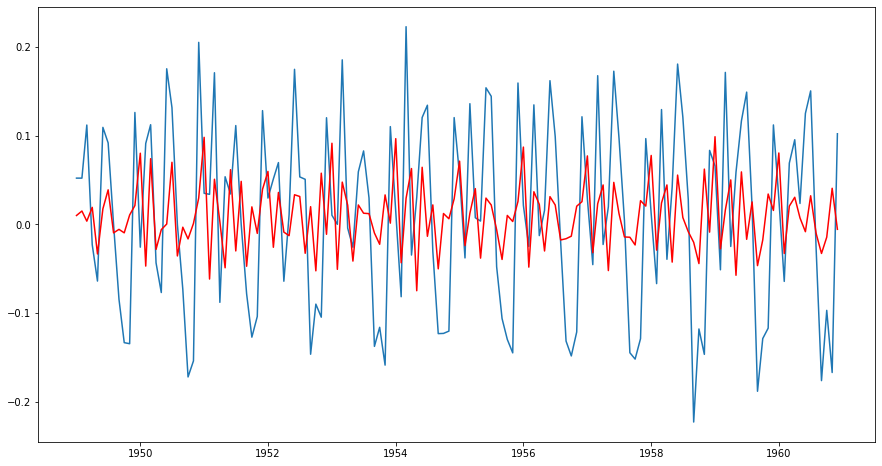

In [62]:
MA_model = ARIMA(df_diff, order=(0,0,2))
MA_model_results = MA_model.fit()
plt.plot(df_diff)
plt.plot(MA_model_results.fittedvalues, color='red')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


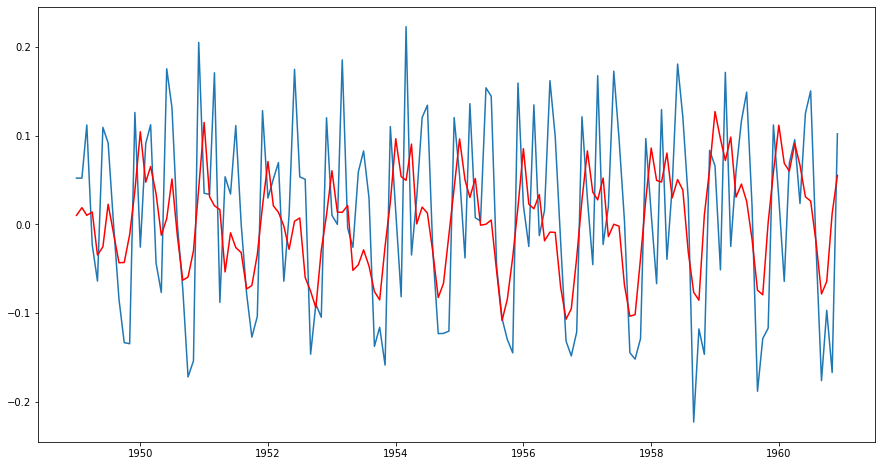

In [63]:
ARIMA_model = ARIMA(df_diff, order=(2,0,1))
ARIMA_results = ARIMA_model.fit()
plt.plot(df_diff)
plt.plot(ARIMA_results.fittedvalues, color='red')

**Time Series at Scale**

In [64]:
from fbprophet import Prophet
df=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df['Month']= pd.to_datetime(df['Month'])
df = df.rename(columns={"Month": "ds", "Passengers": "y"})
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [65]:
model = Prophet()
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
#predict for the next 10 months
future = model.make_future_dataframe(periods=10, freq='M') 
forecast = model.predict(future) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.727984,53.721013,115.297001,106.727984,106.727984,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,0.0,0.0,0.0,84.807353
1,1949-02-01,108.901201,50.862379,107.012271,108.901201,108.901201,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,0.0,0.0,0.0,78.218354
2,1949-03-01,110.864107,85.306645,138.009326,110.864107,110.864107,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,0.0,0.0,0.0,110.361397
3,1949-04-01,113.037323,80.521699,135.081829,113.037323,113.037323,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,0.0,0.0,0.0,107.851823
4,1949-05-01,115.140437,84.845242,140.484196,115.140437,115.140437,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,0.0,0.0,0.0,111.351735


In [68]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].head()
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,1949-01-01,84.807353,53.721013,115.297001,106.727984,106.727984,106.727984
1,1949-02-01,78.218354,50.862379,107.012271,108.901201,108.901201,108.901201
2,1949-03-01,110.361397,85.306645,138.009326,110.864107,110.864107,110.864107
3,1949-04-01,107.851823,80.521699,135.081829,113.037323,113.037323,113.037323
4,1949-05-01,111.351735,84.845242,140.484196,115.140437,115.140437,115.140437


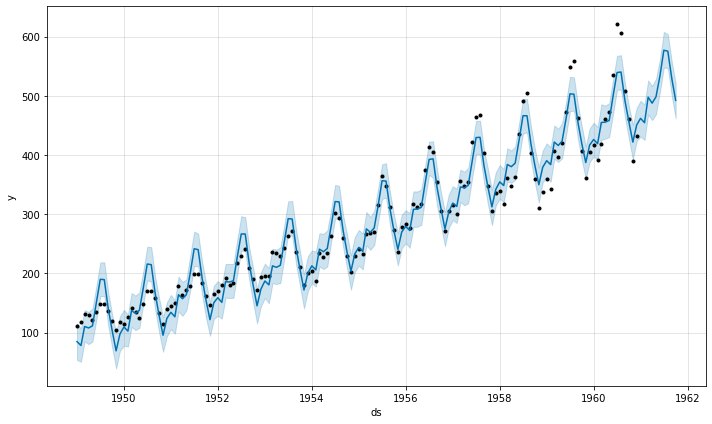

In [69]:
model.plot(forecast)
plt.show()